## TGAS-APOGEE

First load full sample. We cut sample to have only stars with logg>0.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set_palette('Set2')

In [7]:
mock = pd.read_csv('/data/jls/edf/apogee_sample/full_sample_Padova.dat')
data = pd.read_csv('/data/jls/apogee/apogee_data/apogee_stats_sample_withdistancesandpm_unextincted.dat',sep=' ')

In [8]:
data = data[(data.LOGG>0.)].reset_index(drop=True)
print len(data),len(mock)

64343 64245


In [9]:
histargs = {'bins':50,'histtype':'step','normed':True,'lw':2}

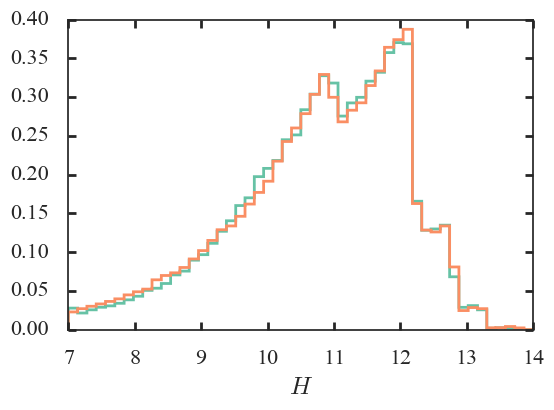

In [10]:
for d in [data,mock]:
    plt.hist(d.H,range=[7.,14.],**histargs)
plt.xlabel(r'$H$')

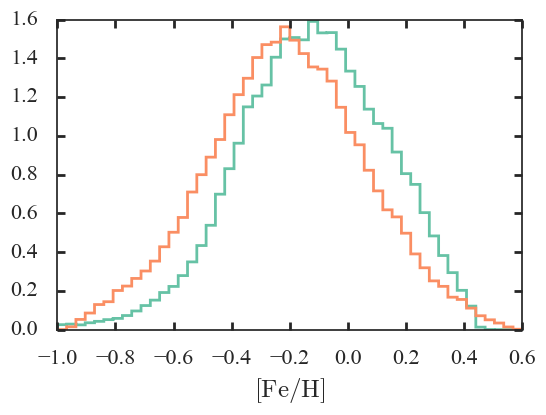

In [11]:
plt.hist(data.FE_H,range=[-1.,0.6],**histargs)
plt.hist(mock.Z,range=[-1.,0.6],**histargs)
plt.xlabel(r'$[\mathrm{Fe}/\mathrm{H}]$')

Now cut to just a TGAS sample.

In [12]:
tgas_data = pd.read_csv('/data/jls/TGAS/apogee_distances_all.csv')
tgas_data['vphitmp']=tgas_data['vphi']
tgas_data['vphi']=tgas_data.vphi-20.

/opt/ioa/software/python/2.7.8/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


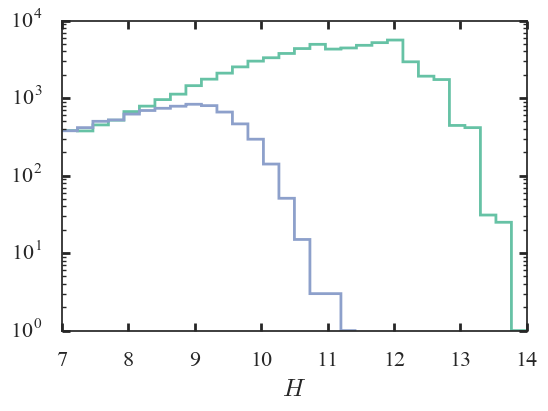

In [13]:
n,b,p=plt.hist(data.H,range=[7.,14.],bins=30,histtype='step',lw=2)
nt,b,p=plt.hist(tgas_data.H,range=[7.,14.],bins=30,histtype='step',lw=2,color=sns.color_palette()[2])
plt.semilogy()
plt.xlabel(r'$H$')

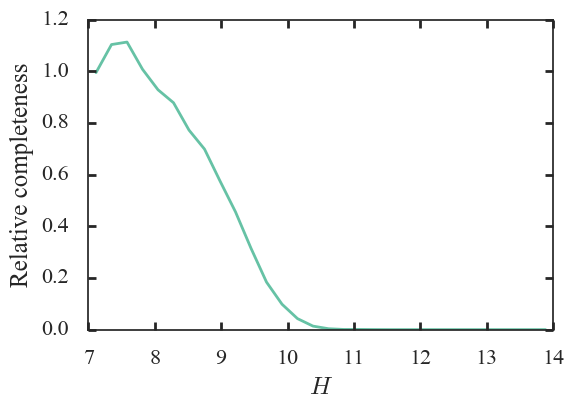

In [14]:
plt.plot(.5*(b[1:]+b[:-1]),nt/n)
plt.ylabel(r'Relative completeness')
plt.xlabel(r'$H$')

In [15]:
from scipy import stats
sf = stats.rv_discrete(name='sf', values=(np.arange(len(n)),nt/n/np.sum(nt/n)))
def samples(Nsize=100000):
    return sf.rvs(size=Nsize)*(b[1]-b[0])+b[0]+np.random.uniform(size=Nsize)*(b[1]-b[0])

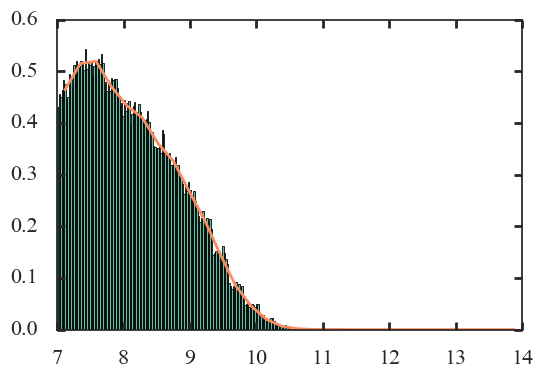

In [16]:
xx=plt.hist(samples(),bins=200,normed=True)
plt.plot(.5*(b[1:]+b[:-1]),nt/n/np.sum(nt/n)/(b[1]-b[0]))

In [17]:
H_samples_tgas = samples(len(tgas_data))
nearest_entry=[np.argmin(np.fabs(mock.H.values-H_s)) for H_s in H_samples_tgas]
mock_tgas_sample = mock.loc[nearest_entry].reset_index(drop=True)

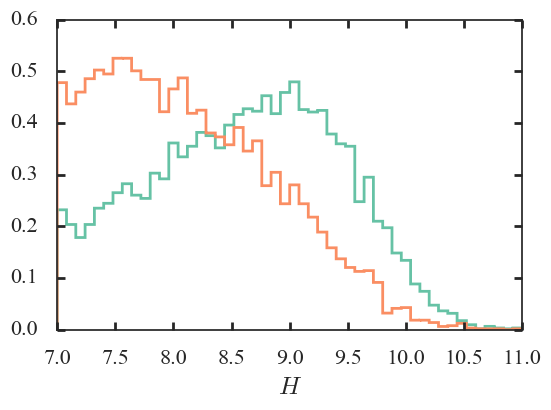

In [18]:
for d in [tgas_data,mock_tgas_sample]:
    plt.hist(d.H,range=[7.,11.],**histargs)
plt.xlabel(r'$H$')

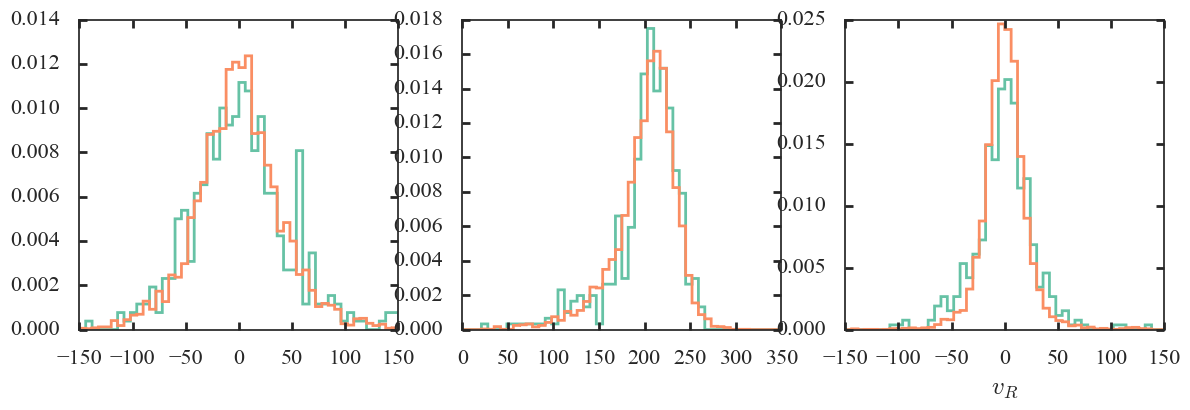

In [19]:
f,ax=plt.subplots(1,3,figsize=[14.,4.])
for d in [tgas_data,mock_tgas_sample]:
    ax[0].hist(d.vR,range=[-150.,150.],**histargs)
    ax[1].hist(d.vphi,range=[0.,350.],**histargs)
    ax[2].hist(d.vz,range=[-150.,150.],**histargs)
plt.xlabel(r'$v_R$')

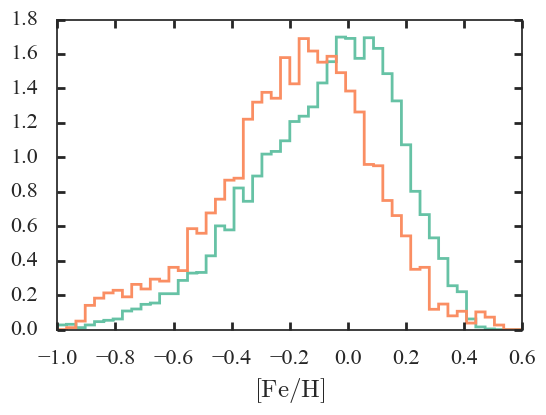

In [20]:
plt.hist(tgas_data.FE_H,range=[-1.,0.6],**histargs)
plt.hist(mock_tgas_sample.Z,range=[-1.,0.6],**histargs)
plt.xlabel(r'$[\mathrm{Fe}/\mathrm{H}]$')